In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
order_products_train_df = pd.read_csv('order_products__train.csv')
order_products_test_df = pd.read_csv('order_products__prior.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')


In [4]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
print('TEST SHAPE:', order_products_test_df.shape)
print('TRAIN SHAPE:', order_products_train_df.shape)

TEST SHAPE: (32434489, 4)
TRAIN SHAPE: (1384617, 4)


In [16]:
count_set = orders_df.eval_set.value_counts()

In [17]:
count_set

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [19]:
tester = departments_df.department_id.value_counts()
tester2 = departments_df.department.value_counts()

In [23]:
len(tester), len(tester2)

(21, 21)

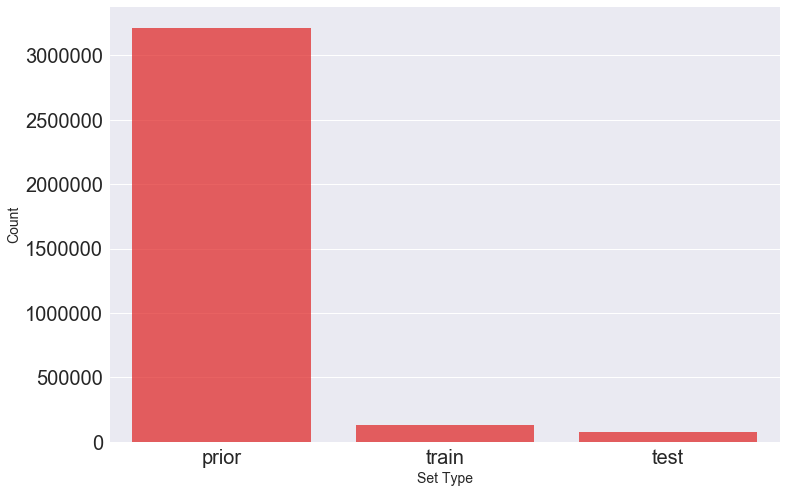

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(count_set.index, count_set.values, alpha=0.7, color='r')
sns.set(font_scale=1)
plt.xlabel('Set Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [57]:
count_order_nums_df = orders_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()


In [58]:
count_order_nums_df.head(10)

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
5,6,4
6,7,21
7,8,4
8,9,4
9,10,6


In [60]:
count_order_num_times = count_order_nums.order_number.value_counts()

In [59]:
count_order_nums_df.min()

user_id         1
order_number    4
dtype: int64

Just validating that there were is a minimum of four orders per person. Let's visualize it.

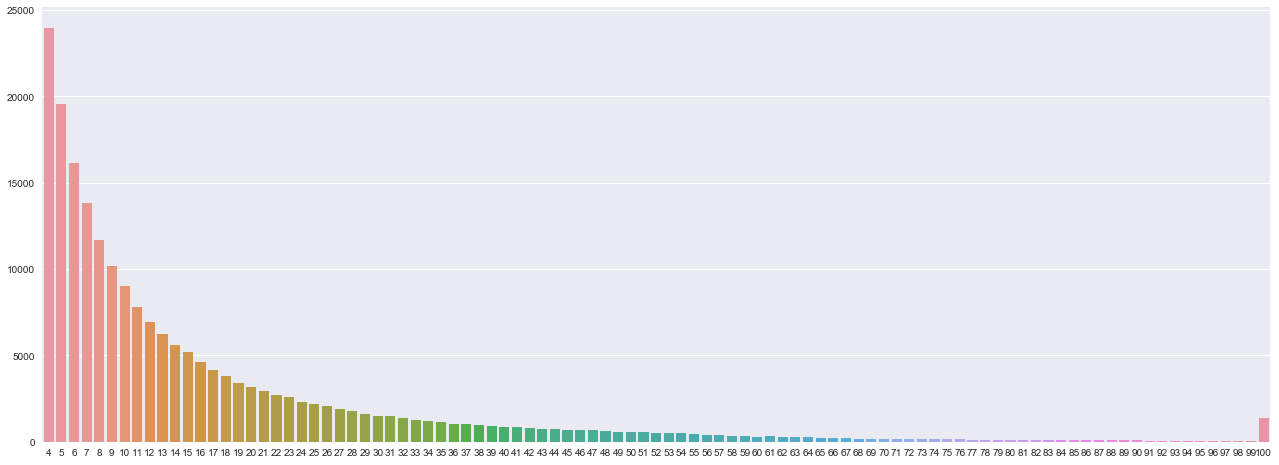

In [67]:
plt.figure(figsize=(22,8))
sns.barplot(count_order_num_times.index, count_order_num_times.values)
plt.show()

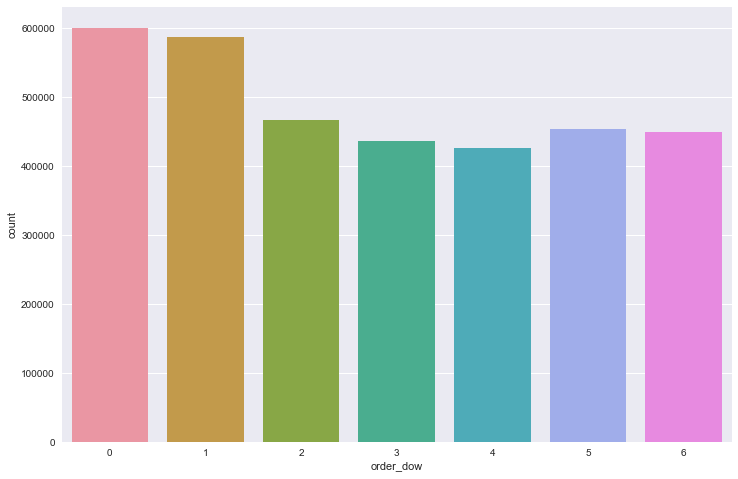

In [74]:
plt.figure(figsize=(12,8))
sns.countplot(orders_df.order_dow, orient='h')
# sns.despine(left=True, bottom=True)